In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [56]:
dataku = pd.read_csv("ai4i2020.csv")

In [57]:
dataku

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


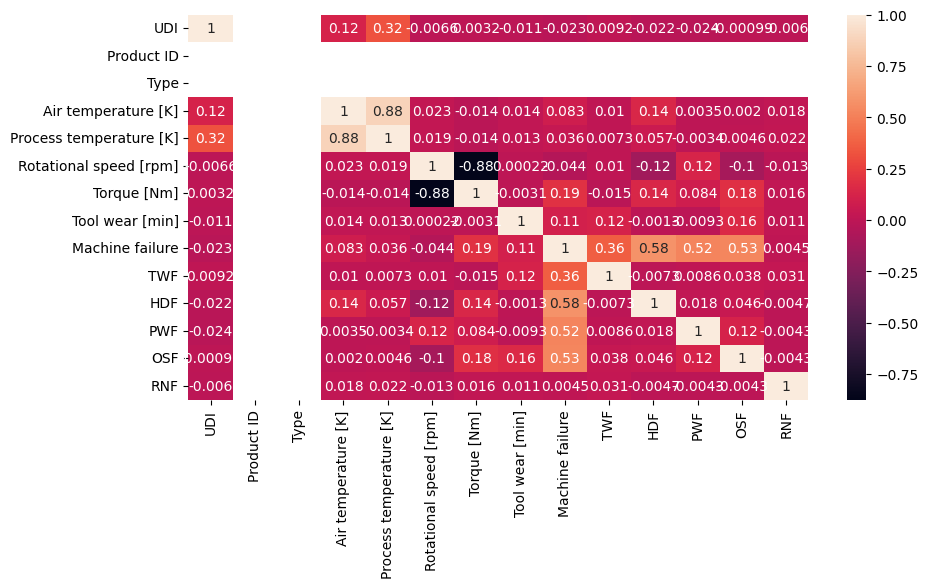

In [65]:
# Convert relevant columns to numerical type
for col in dataku.columns:
    if dataku[col].dtype == 'object':  # Check if column is of object (string) type
        try:
            dataku[col] = pd.to_numeric(dataku[col], errors='coerce')  # Attempt conversion, replace non-convertible with NaN
        except ValueError:
            print(f"Column '{col}' could not be converted to numeric.")

# Fill NaN values (introduced during conversion) with a suitable strategy (e.g., mean)
dataku = dataku.fillna(dataku.mean())

corr_matrix = dataku.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

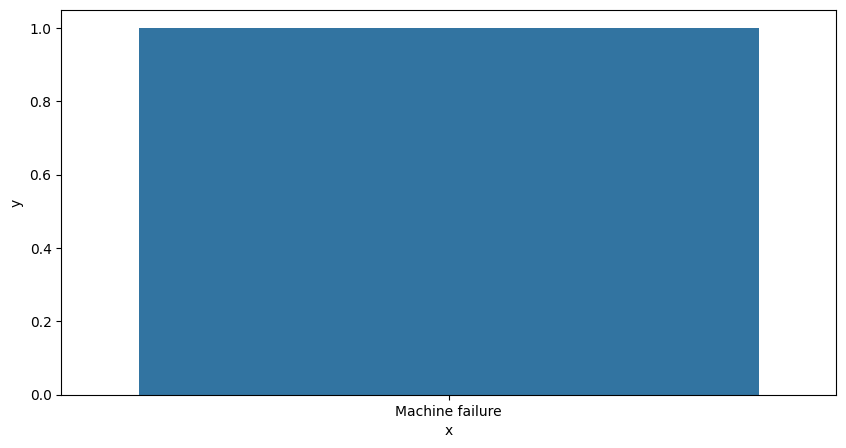

In [66]:
ser = pd.Series("Machine failure")
table = ser.value_counts()
table = table.sort_index()
raw_data = {'x': ['Machine failure'], 'y': table.values} # Change the value of 'x' to match the length of 'y'
sns.barplot(x='x', y='y', data=raw_data)
plt.show()

In [67]:
for column in dataku.columns:
    if dataku[column].dtype == object:  # Check if column is of object (string) type
        dataku[column] = dataku[column].astype('category').cat.codes  # Convert to categorical codes

In [68]:
print(dataku.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [69]:
target = dataku["Machine failure"].to_numpy()
feature = dataku[["Type", "Air temperature [K]", "Process temperature [K]",
                  "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]].to_numpy()

In [70]:
logistic_regressor = LogisticRegression(solver='liblinear',max_iter=200)
logistic_regressor.fit(feature_train,target_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [71]:
conf_mat = metrics.confusion_matrix(target_test, target_test)
print(conf_mat)

[[2899    0]
 [   0  101]]


In [72]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 1.0
Sensitvity  = 1.0
Specificity = 1.0
Precision   = 1.0


In [73]:
feature_test

array([[2.375e+03, 7.698e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.785e+03, 2.062e+03, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [6.302e+03, 8.885e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.029e+03, 7.597e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.098e+03, 7.616e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [6.700e+03, 9.004e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])